In [2]:
import pandas as pd

df = pd.read_csv("data/raw/energy_data.csv")
df.head()

,timestamp,fridge,ac,lights,microwave,total_power
0,2023-01-01 00:00:00,128,0,80,907,1115
1,2023-01-01 01:00:00,52,0,35,0,87
2,2023-01-01 02:00:00,105,0,52,0,157
3,2023-01-01 03:00:00,153,0,0,0,153
4,2023-01-01 04:00:00,113,0,62,0,175


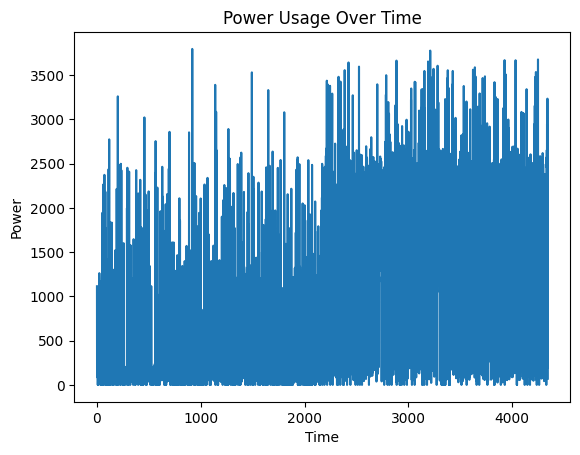

In [3]:
import matplotlib.pyplot as plt

plt.plot(df['total_power'])
plt.title("Power Usage Over Time")
plt.xlabel("Time")
plt.ylabel("Power")
plt.show()


In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(
    df['total_power'],
    model='additive',
    period=24
)

result.plot()
plt.show()


ModuleNotFoundError: No module named 'statsmodels'

In [6]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


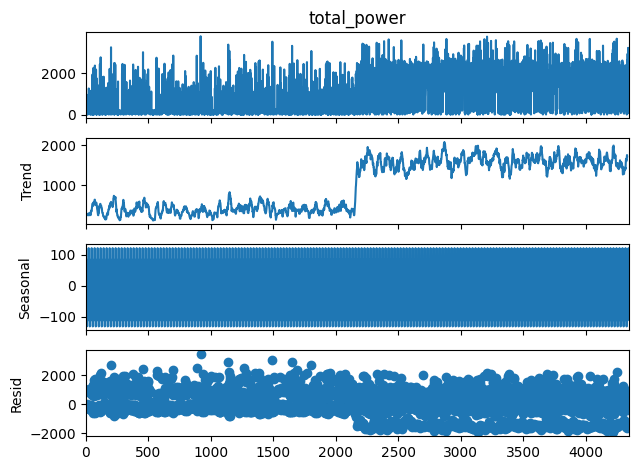

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(
    df['total_power'],
    model='additive',
    period=24
)

result.plot()
plt.show()


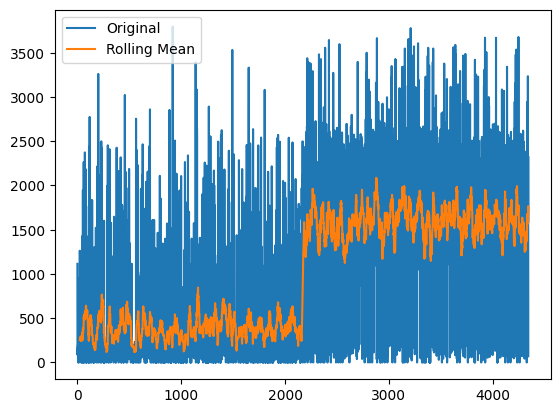

In [9]:
rolling = df['total_power'].rolling(24).mean()

plt.plot(df['total_power'], label="Original")
plt.plot(rolling, label="Rolling Mean")
plt.legend()
plt.show()


In [10]:
from statsmodels.tsa.stattools import adfuller

test = adfuller(df['total_power'])

print("p-value:", test[1])


p-value: 0.09928607842314863


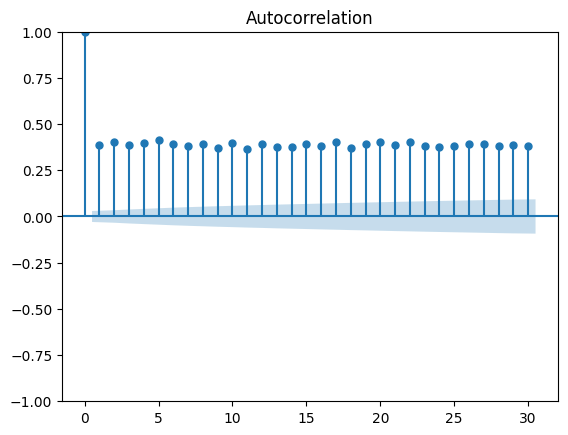

In [11]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df['total_power'], lags=30)
plt.show()
